# Assignment

## Resume Extractor
The goal of assignment is to take an image of resume and take all important data in the image.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'resume-dataset' dataset.
Path to dataset files: /kaggle/input/resume-dataset


# Identify pdf files for engineering resumes


In [2]:
dataset = "/kaggle/input/resume-dataset"
import os

files_and_directories = os.listdir(dataset)
print(files_and_directories)

['Resume', 'data']


In [3]:
dataset = "/kaggle/input/resume-dataset/data"

files_and_directories = os.listdir(dataset)
print(files_and_directories)

['data']


In [4]:
dataset = "/kaggle/input/resume-dataset/data/data"

files_and_directories = os.listdir(dataset)
print(files_and_directories)

['DESIGNER', 'BPO', 'FINANCE', 'CONSTRUCTION', 'SALES', 'AUTOMOBILE', 'CONSULTANT', 'CHEF', 'APPAREL', 'AGRICULTURE', 'TEACHER', 'HR', 'DIGITAL-MEDIA', 'ACCOUNTANT', 'HEALTHCARE', 'INFORMATION-TECHNOLOGY', 'ADVOCATE', 'FITNESS', 'AVIATION', 'PUBLIC-RELATIONS', 'ENGINEERING', 'BUSINESS-DEVELOPMENT', 'BANKING', 'ARTS']


In [5]:
dataset = "/kaggle/input/resume-dataset/data/data/ENGINEERING"

files_and_directories = os.listdir(dataset)
print(files_and_directories)

['19124258.pdf', '14206561.pdf', '11890896.pdf', '21629057.pdf', '28320387.pdf', '26456899.pdf', '27152464.pdf', '44624796.pdf', '19396040.pdf', '37335325.pdf', '50328713.pdf', '64755882.pdf', '82125182.pdf', '43752620.pdf', '16803215.pdf', '10624813.pdf', '21298336.pdf', '28078163.pdf', '22890839.pdf', '25930778.pdf', '31677347.pdf', '20882041.pdf', '20981299.pdf', '13149176.pdf', '32985311.pdf', '30097175.pdf', '17926546.pdf', '25425322.pdf', '38535335.pdf', '81125166.pdf', '33685075.pdf', '61579998.pdf', '16911115.pdf', '55953734.pdf', '19612167.pdf', '47276718.pdf', '17488801.pdf', '25919149.pdf', '15941675.pdf', '28005884.pdf', '12518008.pdf', '22605864.pdf', '23234047.pdf', '23497307.pdf', '17108676.pdf', '51588273.pdf', '39835894.pdf', '11981094.pdf', '31694970.pdf', '86209934.pdf', '10712803.pdf', '56691064.pdf', '15601399.pdf', '20566550.pdf', '90280583.pdf', '17103000.pdf', '28831378.pdf', '28505854.pdf', '24647794.pdf', '35737840.pdf', '62071407.pdf', '49127329.pdf', '270408

## Convert the pdf to images

In [6]:
!pip install pdf2image
!sudo apt-get install poppler-utils -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.10 [186 kB]
Fetched 186 kB in 0s (2,008 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 1264

Converted 19124258.pdf to 2 images.
Images combined successfully.
Combined image saved to: /kaggle/working/engineering_resume_images/19124258_combined.png


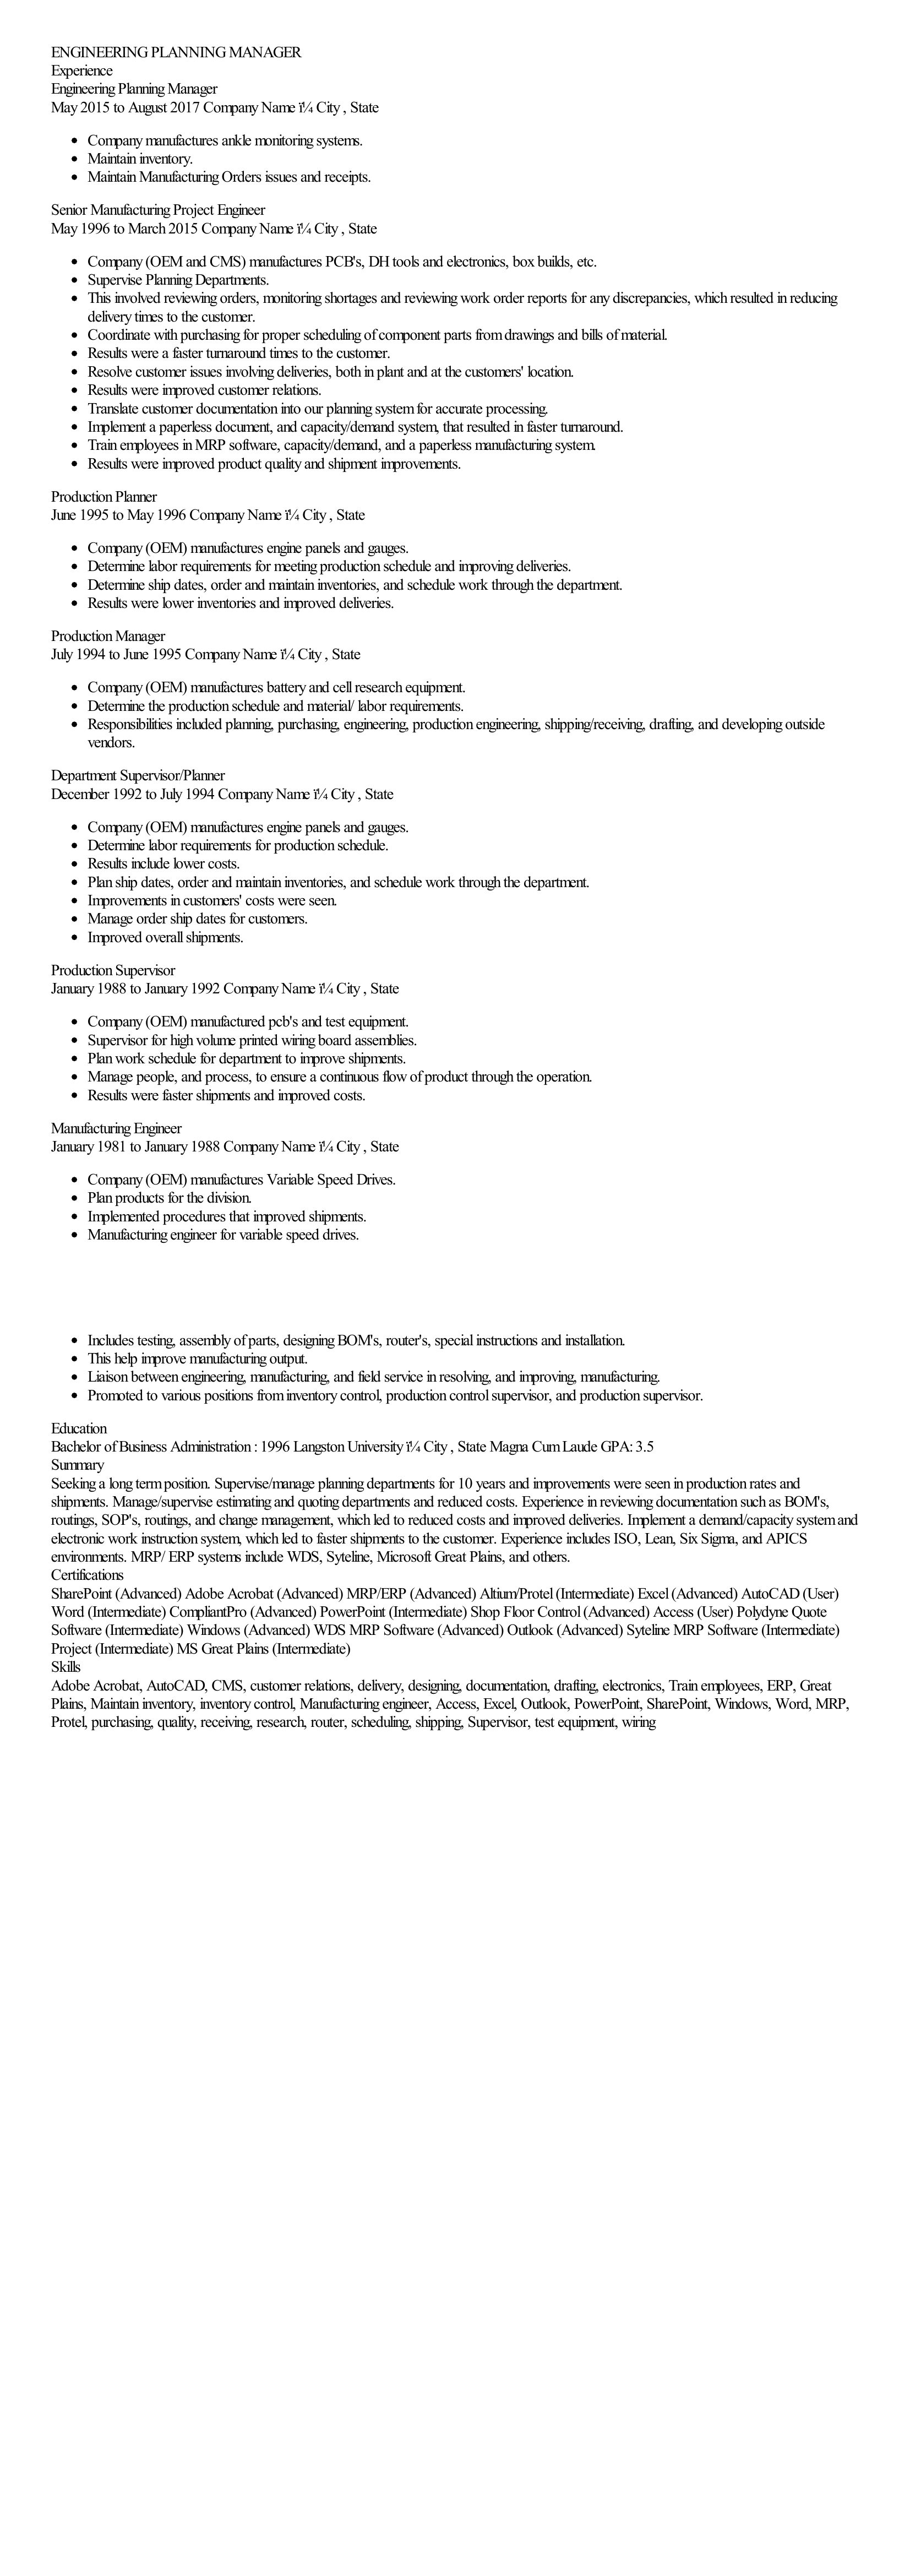

In [7]:
import os
from pdf2image import convert_from_path
from PIL import Image
from IPython.display import display

dataset_path = "/kaggle/input/resume-dataset/data/data/ENGINEERING"
output_dir = "/kaggle/working/engineering_resume_images"
os.makedirs(output_dir, exist_ok=True)

filename = "19124258.pdf"
pdf_path = os.path.join(dataset_path, filename)

try:
    images = convert_from_path(pdf_path)
    print(f"Converted {filename} to {len(images)} images.")

    if images:
        widths, heights = zip(*(i.size for i in images))

        max_width = max(widths)
        total_height = sum(heights)

        combined_image = Image.new('RGB', (max_width, total_height))

        y_offset = 0
        for img in images:
            combined_image.paste(img, (0, y_offset))
            y_offset += img.size[1]

        print("Images combined successfully.")

        # Save the combined image
        combined_image_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_combined.png")
        combined_image.save(combined_image_path, "PNG")
        print(f"Combined image saved to: {combined_image_path}")
        image = combined_image
        # Display the combined image
        display(image)
    else:
        print("No images to combine.")

except Exception as e:
    print(f"Error converting {filename}: {e}")

I have successfully converted the multi-page PDF into a single image, saved it to the output directory.

## Image Preprocessing
Make Binairization, Gray scaling and Skew correction for the image

Converted to grayscale.
Applied Gaussian blur.
Applied binarization using Otsu's method on the blurred image.
Preprocessing steps completed (grayscale, Gaussian blur, and binarization). Skew correction requires more advanced techniques.

Displaying the preprocessed first page:


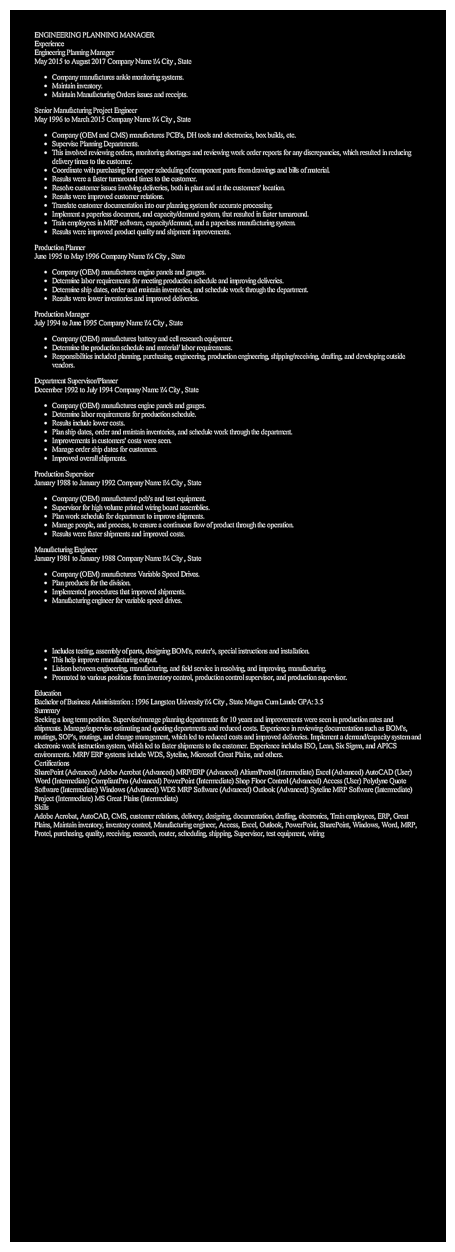

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Ensure combined_image is loaded from the previous cell
if combined_image is not None:
    # Convert PIL Image to OpenCV format (BGR)
    opencv_image = cv2.cvtColor(np.array(combined_image), cv2.COLOR_RGB2BGR)

    # Convert to grayscale
    gray_image = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2GRAY)
    print("Converted to grayscale.")

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    print("Applied Gaussian blur.")

    # Binarization
    binarized_image = cv2.adaptiveThreshold(
        blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 4)
    print("Applied binarization using Otsu's method on the blurred image.")

    # Skew correction (requires deskewing)
    # coords = cv2.findNonZero(binarized_image)
    # rect = cv2.minAreaRect(coords)
    # angle = rect[-1]

    # if angle < -45:
    #     angle = -(90 + angle)
    # else:
    #     angle = -angle

    # (h, w) = gray_image.shape[:2]
    # center = (w // 2, h // 2)
    # M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # deskewed_image = cv2.warpAffine(
    #     gray_image, M, (w, h),
    #     flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE
    # )
    # For now, I will just keep the binary image as the output of preprocessing
    preprocessed_image_cv2 = binarized_image
    print("Preprocessing steps completed (grayscale, Gaussian blur, and binarization). Skew correction requires more advanced techniques.")


    # Convert back to PIL Image for display if needed later
    preprocessed_image_pil = Image.fromarray(preprocessed_image_cv2)

    if preprocessed_image_pil:
      print("\nDisplaying the preprocessed first page:")
      plt.figure(figsize=(12, 16))
      plt.imshow(preprocessed_image_pil, cmap='gray')
      plt.axis('off')
      plt.show()

else:
    print("Combined image not found. Please run the previous cell to load the image.")

##Image to Text

In [10]:
!pip install pytesseract

In [11]:
import pytesseract
from PIL import Image

print("Extracting text from all preprocessed pages...")

full_text = ""

# Use the preprocessed_image_pil directly as it's already a PIL Image
text = pytesseract.image_to_string(preprocessed_image_pil)

full_text += text + "\n\n--- Page Break ---\n\n"

print("Text extraction complete!")

#first 1000 characters
print("\nStart of Extracted Text (First 1000 Chars)")
print(full_text[:1000])
print("...")
print(" End of Preview ")

Extracting text from all preprocessed pages...
Text extraction complete!

Start of Extracted Text (First 1000 Chars)
ENGINEERING PLANNING MANAGER

schivor anes

Engineering Planning Manager

May 2015 to August 2017 Company Name 1% City , State

* Company manufactures ankle monitoring systems.
CREW Elieiebien ona
© Maintain Manufacturing Orders issues and receipts.

Nom WEnlietinca grelcaeonuinees
May 1996 to March 2015 Company Nanv 1% City , State

* Company (OEM and CMS) manufactures PCB's, DH tools and electronics, box builds, etc.

© Supervise Planning Departments.

© This involved reviewing orders, monitoring shortages and reviewing work order reports for any discrepancies, which resulted in reducing
Goi team urecmORinedalcon ee

Coordinate with purchasing for proper schedulng of component parts from drawings and bills of material.
Results were a faster turnaround times to the customer.

Resolve customer issues involving deliveries, both in plant and at the customers’ location.

Re

## Information Extraction


In [16]:
!pip install google-genai

In [28]:
import google.generativeai as genai
from google.colab import userdata
import json

genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

resume_prompt_template_v2 = """
Extract the key information from the provided resume text.
The text has been extracted from a PDF using an OCR process.
If you find errors in the text, please try to infer the correct information.

**Important: If a specific piece of information (like name, email, or phone) is not found in the text, you MUST return `null` for that field.** Do not invent information.

Extract the following information and provide your response only in the specified JSON format:
- name: The full name of the applicant.
- email: The email address.
- phone: The phone number.
- skills: A list of key skills.
- experience: A list of job experiences, where each job is an object with "company", "role", and "duration".
- education: A list of educational qualifications, where each is an object with "degree", "institution", and "year".

Format:
{{
    "name": "Full Name" or null,
    "email": "email@address.com" or null,
    "phone": "123-456-7890" or null,
    "skills": ["Skill 1", "Skill 2", "Skill 3"],
    "experience": [
        {{
            "company": "Company Name",
            "role": "Job Title",
            "duration": "Start Year - End Year"
        }}
    ],
    "education": [
        {{
            "degree": "Degree Name",
            "institution": "University/College Name",
            "year": "Graduation Year"
        }}
    ]
}}

Here is the text:

{extracted_text}
"""

def extract_info_with_gemini_from_text(text_from_resume):
    """
    Uses Gemini to extract structured information from a text prompt.

    """
    # Use an available preview model
    model = genai.GenerativeModel('gemini-2.5-flash')

    prompt = resume_prompt_template_v2.format(extracted_text=text_from_resume)

    response = model.generate_content(prompt)

    try:
        cleaned_text = response.text.replace('```json', '').replace('```', '').strip()
        start_index = cleaned_text.find('{')
        end_index = cleaned_text.rfind('}') + 1

        if start_index == -1 or end_index == 0:
            print("!! ERROR: Could not find a JSON object in the model's response. !!")
            print(f"   Raw response was:\n---\n{response.text}\n---")
            return None

        json_string = cleaned_text[start_index:end_index]
        return json.loads(json_string)

    except (json.JSONDecodeError, IndexError) as e:
        print(f"\n!! FAILED TO PARSE JSON !!")
        print(f"   Error: {e}")
        print(f"   Raw response was:\n \n{response.text}\n")
        return None

extracted_data = extract_info_with_gemini_from_text(full_text)

if extracted_data:
    print("\nExtracted Information")
    print(json.dumps(extracted_data, indent=4))


Extracted Information
{
    "name": null,
    "email": null,
    "phone": null,
    "skills": [
        "Adobe Acrobat",
        "AutoCAD",
        "Bills of Material (BOMs)",
        "Capacity/Demand Planning",
        "Change Management",
        "CMS",
        "CompliantPro",
        "Customer Relations",
        "Designing",
        "Documentation",
        "Drafting",
        "Electronics Manufacturing",
        "Employee Training",
        "ERP Systems",
        "Excel",
        "ISO",
        "Inventory Control",
        "Lean Manufacturing",
        "Manufacturing Engineering",
        "Microsoft Access",
        "Microsoft Great Plains",
        "Microsoft Outlook",
        "Microsoft PowerPoint",
        "Microsoft Project",
        "Microsoft Word",
        "MRP Systems",
        "Polydyne Quote Software",
        "Production Scheduling",
        "Routings",
        "SharePoint",
        "Shop Floor Control",
        "Six Sigma",
        "SOPs",
        "Syteline MRP",
    

## Conclusion

In this notebook, we successfully built a basic resume extractor using several steps:

1. **Data Loading**: We loaded the resume dataset from Kaggle.
2. **File Identification**: We navigated through the dataset to find the PDF files for engineering resumes.
3. **PDF to Image Conversion**: We converted a multi-page engineering resume PDF into a single combined image using `pdf2image`.
4. **Image Preprocessing**: We preprocessed the combined image by converting it to grayscale, applying Gaussian blur, and binarization to prepare it for text extraction.
5. **Image to Text**: We used `pytesseract` to extract text from the preprocessed image.
6. **Information Extraction**: We utilized the Gemini API to extract structured information such as skills, experience, and education from the extracted text in JSON format.

While the extraction of personal information like name, email, and phone was not successful in this instance due to potential OCR errors or the format of the resume, the process demonstrated the feasibility of using OCR and large language models for extracting structured data from resumes. Further improvements could involve more advanced image preprocessing techniques, fine-tuning the OCR process, or using a more robust information extraction model or prompt.